In [1]:
import os
import pandas as pd
import warnings 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)

In [2]:
path = '../data/'

train = pd.read_csv(path+'4_train.csv')
test = pd.read_csv(path+'4_test.csv')

train.shape, test.shape

((2952, 73), (1008, 72))

## 전용면적 범주화

<AxesSubplot:>

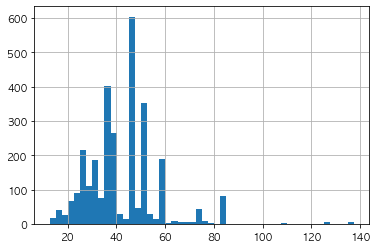

In [3]:
train.loc[train['전용면적']<150,'전용면적'].hist(bins=50) # 전용면적 상한 100, 하한 15

In [4]:
# train과 test 셋 합치기
print(train.shape, test.shape)
all_df = pd.concat([train.drop("등록차량수",axis=1), test])
all_df.reset_index(inplace=True, drop=True)
print(all_df.shape)

(2952, 73) (1008, 72)
(3960, 72)


46     781
36     485
51     474
39     338
26     286
59     248
31     149
33      97
84      93
37      80
29      76
21      70
23      66
16      61
27      56
74      51
49      51
32      42
100     37
54      34
24      34
28      33
15      31
20      27
38      25
22      19
55      19
19      18
18      17
41      16
42      15
30      11
45      11
75      11
44      11
40      10
50       9
35       9
63       7
52       6
34       5
47       5
72       5
17       4
66       4
43       4
67       4
61       3
79       3
82       2
25       2
57       2
48       1
53       1
65       1
Name: 전용면적_5, dtype: int64


<AxesSubplot:xlabel='전용면적_5', ylabel='count'>

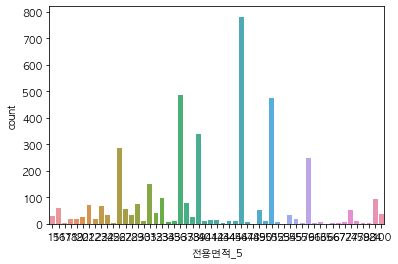

In [5]:
# 전용면적 상/하한 적용
all_df['전용면적_5'] = all_df['전용면적']//5*5
all_df['전용면적_5'] = all_df['전용면적'].astype(int)
idx = all_df[all_df['전용면적']>100].index
all_df.loc[idx, '전용면적_5'] = 100

idx = all_df[all_df['전용면적']<15].index
all_df.loc[idx, '전용면적_5'] = 15

print(all_df['전용면적_5'].value_counts())
sns.countplot(all_df['전용면적_5'],order=np.sort(all_df['전용면적_5'].unique()))

In [6]:
from sklearn.preprocessing import OneHotEncoder

# 원핫인코더
oh_encoder = OneHotEncoder()
ohs = oh_encoder.fit_transform(all_df['전용면적_5'].to_numpy().reshape(-1,1)).toarray()
print(ohs.shape)

# 원핫인코딩 DF 만들기 및 컬럼명 지정
ohs_df = pd.DataFrame(ohs)
ohs_df.columns = ["전용면적_"+str(i) for i in np.sort(all_df['전용면적_5'].unique())]
ohs_df = ohs_df.astype(int)
print(ohs_df.sum())
ohs_df.head()

# 35.0     937
# 45.0     849
# 50.0     524
# 25.0     453
# 30.0     304
# 55.0     269
# 20.0     216
# 15.0     131
# 80.0      95
# 70.0      56
# 40.0      56
# 100.0     37
# 75.0      14
# 60.0      10
# 65.0       9

(3960, 55)
전용면적_15      31
전용면적_16      61
전용면적_17       4
전용면적_18      17
전용면적_19      18
전용면적_20      27
전용면적_21      70
전용면적_22      19
전용면적_23      66
전용면적_24      34
전용면적_25       2
전용면적_26     286
전용면적_27      56
전용면적_28      33
전용면적_29      76
전용면적_30      11
전용면적_31     149
전용면적_32      42
전용면적_33      97
전용면적_34       5
전용면적_35       9
전용면적_36     485
전용면적_37      80
전용면적_38      25
전용면적_39     338
전용면적_40      10
전용면적_41      16
전용면적_42      15
전용면적_43       4
전용면적_44      11
전용면적_45      11
전용면적_46     781
전용면적_47       5
전용면적_48       1
전용면적_49      51
전용면적_50       9
전용면적_51     474
전용면적_52       6
전용면적_53       1
전용면적_54      34
전용면적_55      19
전용면적_57       2
전용면적_59     248
전용면적_61       3
전용면적_63       7
전용면적_65       1
전용면적_66       4
전용면적_67       4
전용면적_72       5
전용면적_74      51
전용면적_75      11
전용면적_79       3
전용면적_82       2
전용면적_84      93
전용면적_100     37
dtype: int64


,전용면적_15,전용면적_16,전용면적_17,전용면적_18,전용면적_19,전용면적_20,전용면적_21,전용면적_22,전용면적_23,전용면적_24,...,전용면적_65,전용면적_66,전용면적_67,전용면적_72,전용면적_74,전용면적_75,전용면적_79,전용면적_82,전용면적_84,전용면적_100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
ohs_df
# all_df

,전용면적_15,전용면적_16,전용면적_17,전용면적_18,전용면적_19,전용면적_20,전용면적_21,전용면적_22,전용면적_23,전용면적_24,...,전용면적_65,전용면적_66,전용면적_67,전용면적_72,전용면적_74,전용면적_75,전용면적_79,전용면적_82,전용면적_84,전용면적_100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
all_df = pd.concat([all_df, ohs_df], axis=1)
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,전용면적_65,전용면적_66,전용면적_67,전용면적_72,전용면적_74,전용면적_75,전용면적_79,전용면적_82,전용면적_84,전용면적_100
0,ERR04_2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,...,0,0,0,0,0,0,0,0,0,0
1,ERR04_2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,...,0,0,0,0,0,0,0,0,0,0
2,ERR04_2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,...,0,0,0,0,0,0,0,0,0,0
3,ERR04_2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,...,0,0,0,0,0,0,0,0,0,0
4,ERR04_2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,NaN,...,0,0,0,0,0,0,0,0,0,0
3956,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000.0,...,0,0,0,0,0,0,0,0,0,0
3957,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000.0,...,0,0,0,0,0,0,0,0,0,0
3958,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000.0,...,0,0,0,0,0,0,0,0,0,0


## 지역 범주화
- 일단은 하는데... 평균/중앙값으로 나누는게 다른 데이터셋이면 의미가 없어지는 것 같다.. 

In [9]:
city_grp1 = ['충청남도','강원도', '제주특별자치도']
city_grp2 = ['경상남도','울산광역시','서울특별시', '부산광역시', '대전광역시', '전라북도', '경상북도', '전라남도', '경기도', '충청북도']
city_grp3 = ['광주광역시','세종특별자치시','대구광역시']

def city_cat(row):
    if row in city_grp1 :
        return 'low'
    elif row in city_grp2 :
        return 'mid'
    elif row in city_grp3 :
        return 'high'
    else:
        return np.nan

all_df['지역_cat'] = all_df['지역'].apply(city_cat)
print(all_df['지역_cat'].dtype)
all_df.head()

object


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,전용면적_66,전용면적_67,전용면적_72,전용면적_74,전용면적_75,전용면적_79,전용면적_82,전용면적_84,전용면적_100,지역_cat
0,ERR04_2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,...,0,0,0,0,0,0,0,0,0,mid
1,ERR04_2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,...,0,0,0,0,0,0,0,0,0,mid
2,ERR04_2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,...,0,0,0,0,0,0,0,0,0,mid
3,ERR04_2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,...,0,0,0,0,0,0,0,0,0,mid
4,ERR04_2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,...,0,0,0,0,0,0,0,0,0,mid


## train셋과 test 셋 분리

In [10]:
print(train.shape, test.shape)
train_new = all_df.iloc[:2952,:]
train_new['등록차량수'] = train['등록차량수']
test_new = all_df.iloc[2952:, :]

print(train_new.shape, test_new.shape)

(2952, 73) (1008, 72)
(2952, 130) (1008, 129)


## 전용면적 비례 차량수 피처 생성

In [11]:
def df_new(df):
    
    # 전용면적의 소수점 없애기
    df['전용면적'] = df['전용면적'].apply(int)
    
    # 겹치는 전용면족 행 병합(결측치 없는 피처로 구분)
    cols = list(df.columns)
    cols.remove('전용면적별세대수')
    cols.remove('지하철')
    df_new = df.groupby(cols, as_index=False).agg({'전용면적별세대수': 'sum'})
    
    # 각 전용면적과 그에 상응하는 세대수의 곱
    df_new['면적_세대수_곱']  = df_new['전용면적'] * df_new['전용면적별세대수']
    
    # 각 단지코드당 계산된 실제 총 세대수
    df_new['면적_세대수_곱_총합'] = df_new['면적_세대수_곱'].groupby(df_new['단지코드']).transform('sum')
    
    # 비율 계산
    df_new['면적_세대수_비율'] = df_new['면적_세대수_곱']/df_new['면적_세대수_곱_총합']
    
    # 전용면적_비례_차량수
    try :
        df_new['전용면적_비례_차량수'] = df_new.apply(lambda row: (row['면적_세대수_비율'] * row['등록차량수']), axis=1)
    except :
        return df_new
    
    return df_new

print(train_new.shape, test_new.shape)

train_new = df_new(train_new)
test_new = df_new(test_new)

print(train_new.shape, test_new.shape)

(2952, 130) (1008, 129)
(1262, 133) (461, 131)


## 최종 피처

In [14]:
list(train_new.columns)

['단지코드',
 '총세대수',
 '임대건물구분',
 '지역',
 '공급유형',
 '전용면적',
 '공가수',
 '자격유형',
 '임대보증금',
 '임대료',
 '버스정류장',
 '단지내주차면수',
 'ERROR1',
 '임대건물구분_lb',
 '상가',
 '아파트',
 '지역_lb',
 '강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도',
 '공급유형_lb',
 '공공분양',
 '공공임대(10년)',
 '공공임대(50년)',
 '공공임대(5년)',
 '공공임대(분납)',
 '국민임대',
 '영구임대',
 '임대상가',
 '장기전세',
 '행복주택',
 '자격유형_lb',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'ERROR1_lb',
 '나머지',
 '분양상가',
 '분양아파트',
 '총세대수_lb',
 '총세대수_lb_A1',
 '총세대수_lb_B1',
 '총세대수_lb_C1',
 '총세대수_lb_D1',
 '총세대수_lb_E1',
 '전용면적_5',
 '전용면적_15',
 '전용면적_16',
 '전용면적_17',
 '전용면적_18',
 '전용면적_19',
 '전용면적_20',
 '전용면적_21',
 '전용면적_22',
 '전용면적_23',
 '전용면적_24',
 '전용면적_25',
 '전용면적_26',
 '전용면적_27',
 '전용면적_28',
 '전용면적_29',
 '전용면적_30',
 '전용면적_31',
 '전용면적_32',
 '전용면적_33',
 '전용면적_34',
 '전용면적_35',
 '전용면적_36',
 '전용면적_37',
 '전용면적_38',
 '전용면적_39',
 '전용면적_40',
 '전용면적_41',
